# 03. Convolution Neural Networks and Computer Vision with TensorFlow

Going to cover:
* Getting a dataset to work
* Architecture of convolution neural network
* A quick end-to-end example
* Steps in modelling for binary image classification with CNNs
    * Becoming one with the data
    * Preparing data for modelling
    * Creating a CNN model
    * Fitting a model
    * Evaluating a model
    * Improving a model
    * Making a prdiction with trained model
* Steps in modelling for multi-class image clasfication with CNNs
* Same as above (With different dataset)

## Creating data to view and fit

In [43]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [44]:
# Check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [45]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [46]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


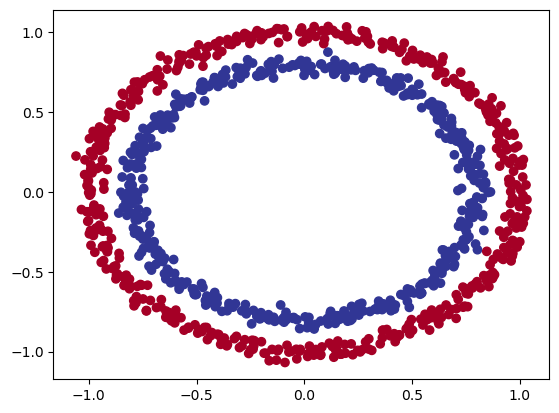

In [47]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shape

In [48]:
# Check the shape of features and labels
x.shape, y.shape

((1000, 2), (1000,))

## Steps in modeling
1. Create or import a model
2. Compile the model
3. Fit the model
4. evaluate the model
5. Tweak
6. Evaluate...

In [49]:
import tensorflow as tf
# Set random seeds
tf.random.set_seed(42)
# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])



# Fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 3ms/step - loss: 2.3814 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7171 - accuracy: 0.4900
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.4850
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5030
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4740


In [50]:
# Traning for longer time
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [51]:
# Set the random seeds
tf.random.set_seed(42)

# Create a model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])



# Fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [52]:
# Evaluate the model
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932669878005981, 0.5]

## Improving the model
1. Create a model with more layers
2. compiling model with differnt optimizer
3. Fitting the model

In [53]:
# Set random seeds
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(x, y, epochs=100, verbose=0)

In [54]:
# Evaluate the model
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5120


[0.6976405382156372, 0.5120000243186951]

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, x, y):
    """
    Plot the decision boundary created by a model prediction on x.
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Create x value
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


313/313 [==============================] - 0s 1ms/step
Binary classification


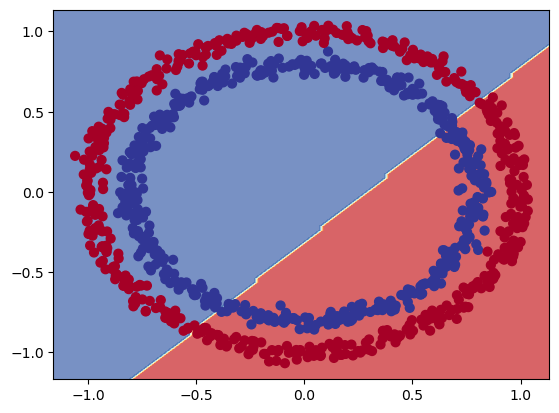

In [56]:
# Check out prediction 
plot_decision_boundary(model=model_3, x=x, y=y)

In [57]:
# See if can be used for regression problem..
tf.random.set_seed(42)

# Create some regression data
x_regression = tf.range(10, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split regression data into training and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[152:]

# Fit model to the regression data
#model_3.fit(x_reg_train, y_reg_train, epochs=100)

In [58]:
# Set random seeds
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 479.9775 - mae: 479.9775
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 347.3228 - mae: 347.3228
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 219.1818 - mae: 219.1818
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 86.3444 - mae: 86.3444
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 65.7710 - mae: 65.7710
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 94.4709 - mae: 94.4709
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 64.5512 - mae: 64.5512
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 41.0185 - mae: 41.0185
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.4957 - mae: 43.4957
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 38.3369 - mae: 38.3369
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 4ms/step


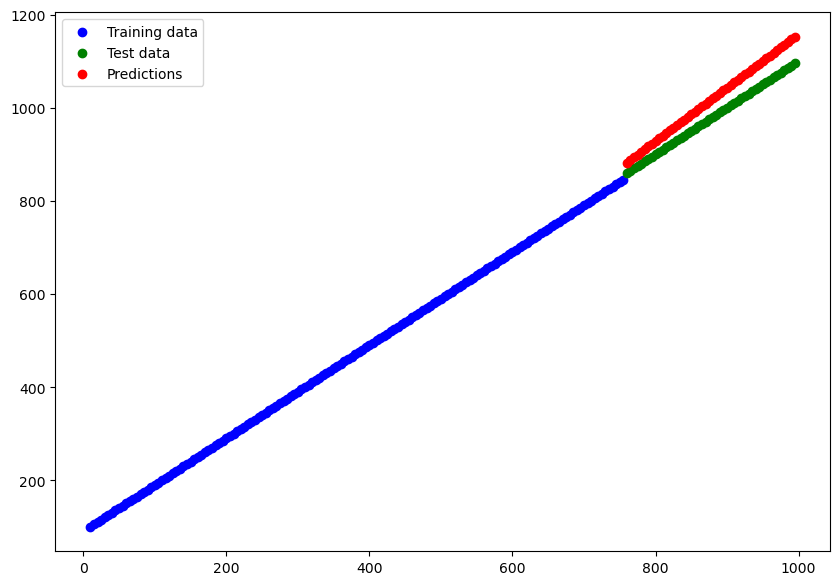

In [59]:
# Make predictions with our trained model
y_reg_prads = model_3.predict(x_reg_test)

# plot the model's predictions against regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test, y_reg_prads, c="r", label="Predictions")
plt.legend();

### The missing piece: Non-linearity

In [60]:
# Set the random seeds
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(x, y, epochs=100)

Epoch 1/100


c:\Users\Vass\anaconda3\envs\tf_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 0s 3ms/step - loss: 5.8002 - accuracy: 0.4780
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7540 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7197 - accuracy: 0.4770
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6869 - accuracy: 0.4750
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 5.6791 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 5.6779 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6762 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6750 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6736 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6647 - accuracy: 0.4770
Epoch 11/100
32/32 [=

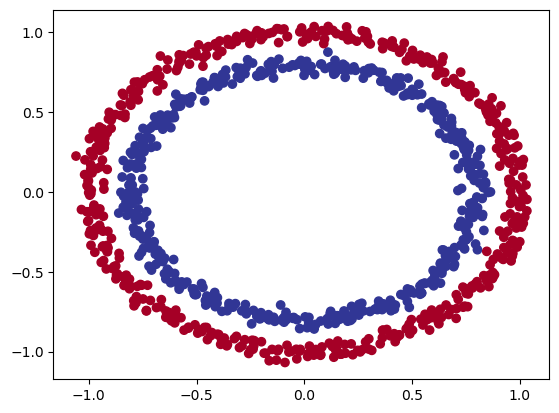

In [61]:
# Check out the data

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
Binary classification


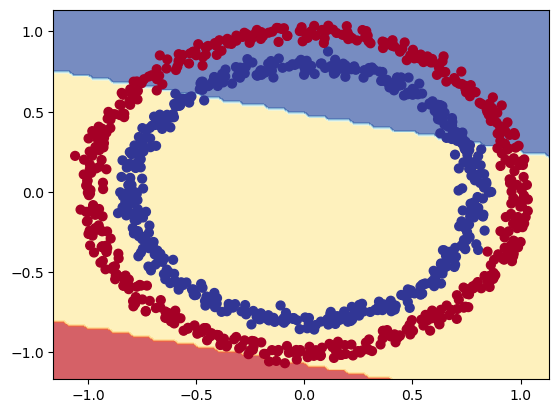

In [62]:
# Check the decision boundary for last model
plot_decision_boundary(model=model_4, x=x, y=y)

In [63]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_4, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualizing our model's predictions

# ---------------------------------------------------------------------

# Working with a larger example ( Multiclass classification)

In [64]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data already has been sorted into tranining and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [65]:
# Show the first training example
print(f"Training salmpe:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training salmpe:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [66]:
# Check the shape of the data
train_data[0].shape, train_labels[0].shape

((28, 28), ())

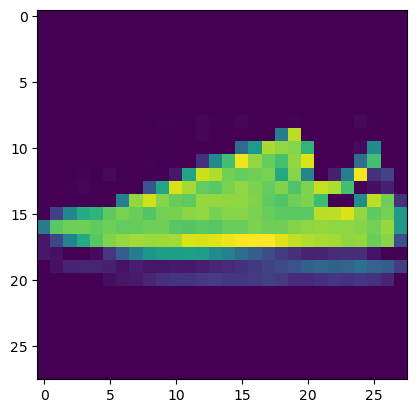

In [67]:
# Plot a single data
import matplotlib.pyplot as plt
plt.imshow(train_data[6])

In [68]:
# Check the sample label
train_labels[7]

2

In [69]:
# Create a small list
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

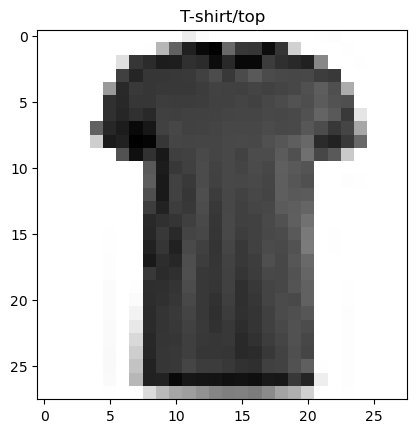

In [70]:
# Plot an example image and it's labels
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

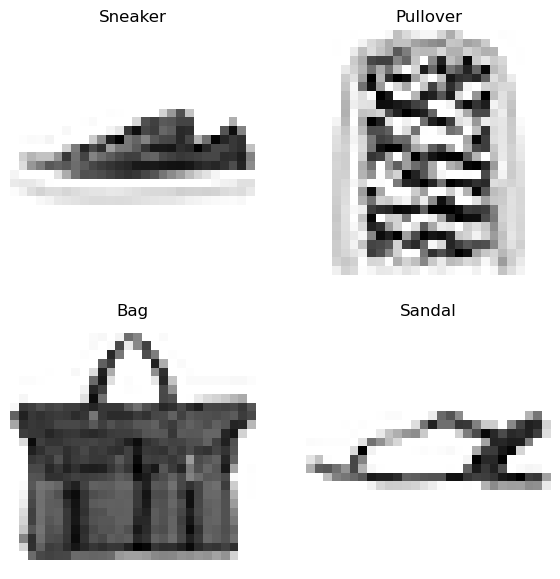

In [71]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a Multiclass Classification Model

For multi-class classification model have similar architecture to binary classifers :
* Input shape = 28 * 28 (shape of the one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrosstentropy()
* Output layer activation = Softmax (not sigmoid)

In [72]:
# Ste random seeds
tf.random.set_seed(42)

# Create the model
model_11  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4741 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [73]:
model_11.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 4)                 3140      
                                                                 
 dense_37 (Dense)            (None, 4)                 20        
                                                                 
 dense_38 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [75]:
# Training and tesing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check the min and max values of the scaled data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [76]:
# Set random seeds
tf.random.set_seed(42)

# Create the model
model_12  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1819 - accuracy: 0.5786 - val_loss: 0.8259 - val_accuracy: 0.7291
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7204 - accuracy: 0.7564 - val_loss: 0.7095 - val_accuracy: 0.7573
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6411 - accuracy: 0.7717 - val_loss: 0.6463 - val_accuracy: 0.7708
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6053 - accuracy: 0.7782 - val_loss: 0.6240 - val_accuracy: 0.7813
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5833 - accuracy: 0.7868 - val_loss: 0.6099 - val_accuracy: 0.7833
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5676 - accuracy: 0.7959 - val_loss: 0.6350 - val_accuracy: 0.7785
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5558 - accuracy: 0.8014 - val_loss: 0.6003 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

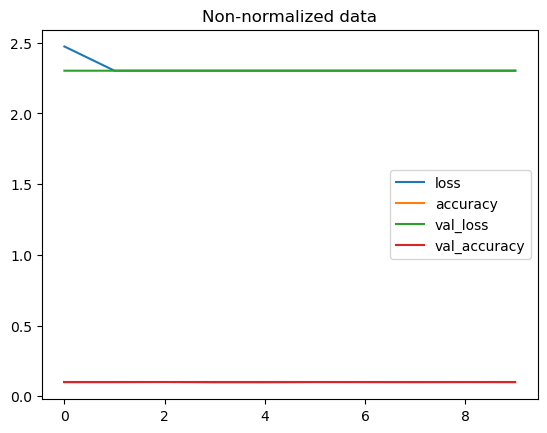

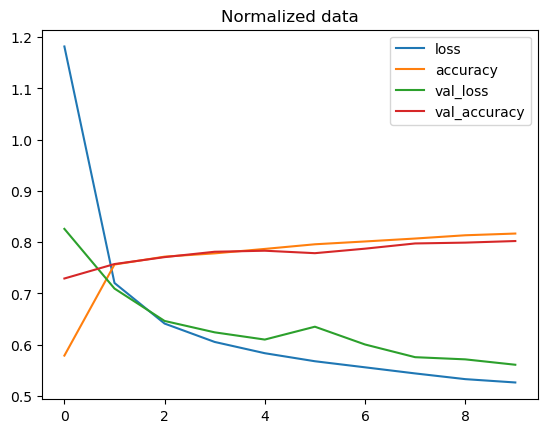

In [77]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")


## Finding the ideal learning rate

In [78]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

# Create a learning rate callback
lr_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_sheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3169 - accuracy: 0.4896 - val_loss: 0.9556 - val_accuracy: 0.6255 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7898 - accuracy: 0.7047 - val_loss: 0.7306 - val_accuracy: 0.7154 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6873 - accuracy: 0.7312 - val_loss: 0.6940 - val_accuracy: 0.7339 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6499 - accuracy: 0.7536 - val_loss: 0.6588 - val_accuracy: 0.7645 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6201 - accuracy: 0.7721 - val_loss: 0.6320 - val_accuracy: 0.7729 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6001 - accuracy: 0.7837 - val_loss: 0.6441 - val_accuracy: 0.7731 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

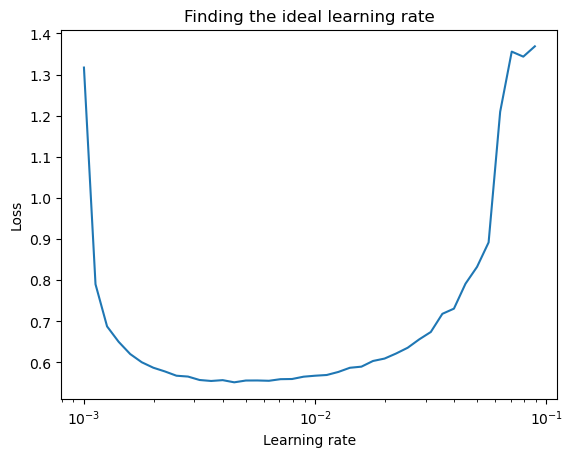

In [79]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [80]:
# Refit  the model with the ideal learning rate
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4730 - accuracy: 0.3682 - val_loss: 0.9372 - val_accuracy: 0.6747
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7505 - accuracy: 0.7327 - val_loss: 0.7072 - val_accuracy: 0.7523
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6552 - accuracy: 0.7656 - val_loss: 0.6635 - val_accuracy: 0.7693
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6134 - accuracy: 0.7834 - val_loss: 0.6251 - val_accuracy: 0.7848
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5829 - accuracy: 0.7999 - val_loss: 0.6049 - val_accuracy: 0.7947
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5636 - accuracy: 0.8062 - val_loss: 0.5997 - val_accuracy: 0.7986
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5513 - accuracy: 0.8109 - val_loss: 0.5913 - val_accuracy:

## Evaluating the multiclass classification model

* Evaluate the model using other classification metrics (precision, recall, f1-score)
* Assess some of its predictions (through visualizations)
* Improve its results (by training for longer or changing the architecture)
* Save and export it for use in an application

In [98]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)
        
    

In [105]:
# Make some predictions with the model
y_preds = model_14.predict(test_data_norm)

# View the first 5 predictions
y_preds[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.8617899e-06, 8.0742037e-05, 2.6470251e-10, 3.4408411e-06,
        1.7282592e-15, 1.3140288e-01, 2.4359565e-07, 1.2198936e-01,
        2.0981563e-05, 7.4650049e-01],
       [5.7059592e-03, 5.9520151e-03, 9.2852956e-01, 3.2099219e-05,
        1.8993527e-02, 2.9743583e-10, 4.0720876e-02, 1.6611946e-07,
        3.4728175e-06, 6.2330844e-05],
       [3.3211362e-04, 9.9961686e-01, 1.8340330e-05, 2.4511082e-05,
        1.6067133e-06, 4.8445829e-28, 6.4970386e-06, 3.3183057e-21,
        7.4099594e-15, 3.2578755e-13],
       [1.1821496e-05, 9.9971539e-01, 2.5284558e-10, 2.7283284e-04,
        5.7392741e-12, 2.2054986e-20, 3.7087499e-08, 1.5646510e-17,
        2.0218338e-13, 1.4317594e-10],
       [7.1457312e-02, 4.9158209e-03, 2.7723768e-01, 1.7175218e-02,
        2.1045354e-01, 7.8507850e-07, 4.1756654e-01, 1.5384409e-06,
        1.1832517e-03, 8.1857088e-06]], dtype=float32)

In [106]:
y_preds[0], tf.argmax(y_preds[0]), class_names[tf.argmax(y_preds[0])]

(array([1.8617899e-06, 8.0742037e-05, 2.6470251e-10, 3.4408411e-06,
        1.7282592e-15, 1.3140288e-01, 2.4359565e-07, 1.2198936e-01,
        2.0981563e-05, 7.4650049e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [107]:
# Convert all of the predictions from probabilities to integers
y_preds = y_preds.argmax(axis=1)

# Check the first 10 predictions
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [108]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[716,  24,  38,  50,  16,   0, 147,   0,   9,   0],
       [  1, 952,  13,  26,   2,   1,   5,   0,   0,   0],
       [ 11,   5, 727,   4, 189,   0,  64,   0,   0,   0],
       [ 29,  34,  10, 798,  63,   4,  59,   0,   2,   1],
       [  0,   2, 143,  17, 810,   0,  26,   0,   2,   0],
       [  0,   0,   0,   0,   1, 891,   4,  48,   7,  49],
       [106,  15, 181,  34, 253,   0, 397,   0,  14,   0],
       [  0,   0,   0,   0,   0,  62,   0, 858,   0,  80],
       [  0,   0,   5,  10,   8,  11,  94,   5, 867,   0],
       [  0,   0,   0,   0,   0,  19,   1,  19,   0, 961]], dtype=int64)